In [1]:
import pandas as pd

# Import dataframe and display the first 5 lines
df = pd.read_csv("./data/dataset.csv")
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [2]:
# Get the shape of out dataframe => Our dataset has 1000 row and 9 columns
df.shape

(1000, 9)

In [3]:
# To get statistics about our dataframe count, mean, std, min, max and more
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [4]:
# To get more information about our dataset => types and non-null values for each column
# From what df.info displayed we have 3 types => int64, float64 and object
df.info()

# For Weather, Traffic_level, Time_of_Dat and Courier_Experience_year has null values => 30 values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [5]:
# As I mentioned from the previous results we have missing data in this columns ['Weather', 'Traffic_level', 'Time_of_Dat', 'Courier_Experience_year']
# 30 values for each columns
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [6]:
# We check for duplicated columns => 0 duplicated
df.duplicated().sum()

np.int64(0)

In [7]:
# To check the frequency of each unique value in the categorical columns
columns = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']
for column in columns:
  print(df[column].value_counts())

Weather
Clear    470
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64
Traffic_Level
Medium    390
Low       383
High      197
Name: count, dtype: int64
Time_of_Day
Morning      308
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64
Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64


In [8]:
# From the last results the most occurring class are:
# Weather => Clear    470
# Traffic_Level => Medium    390
# Time_of_Day => Morning      308
# Vehicle_Type => Bike       503

df["Weather"] = df["Weather"].fillna("Clear")
df["Traffic_Level"] = df["Traffic_Level"].fillna("Medium")
df["Time_of_Day"] = df["Time_of_Day"].fillna("Morning")
df["Vehicle_Type"] = df["Vehicle_Type"].fillna("Bike")

df["Courier_Experience_yrs"] = df["Courier_Experience_yrs"].fillna(df["Courier_Experience_yrs"].mean())


df.isnull().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

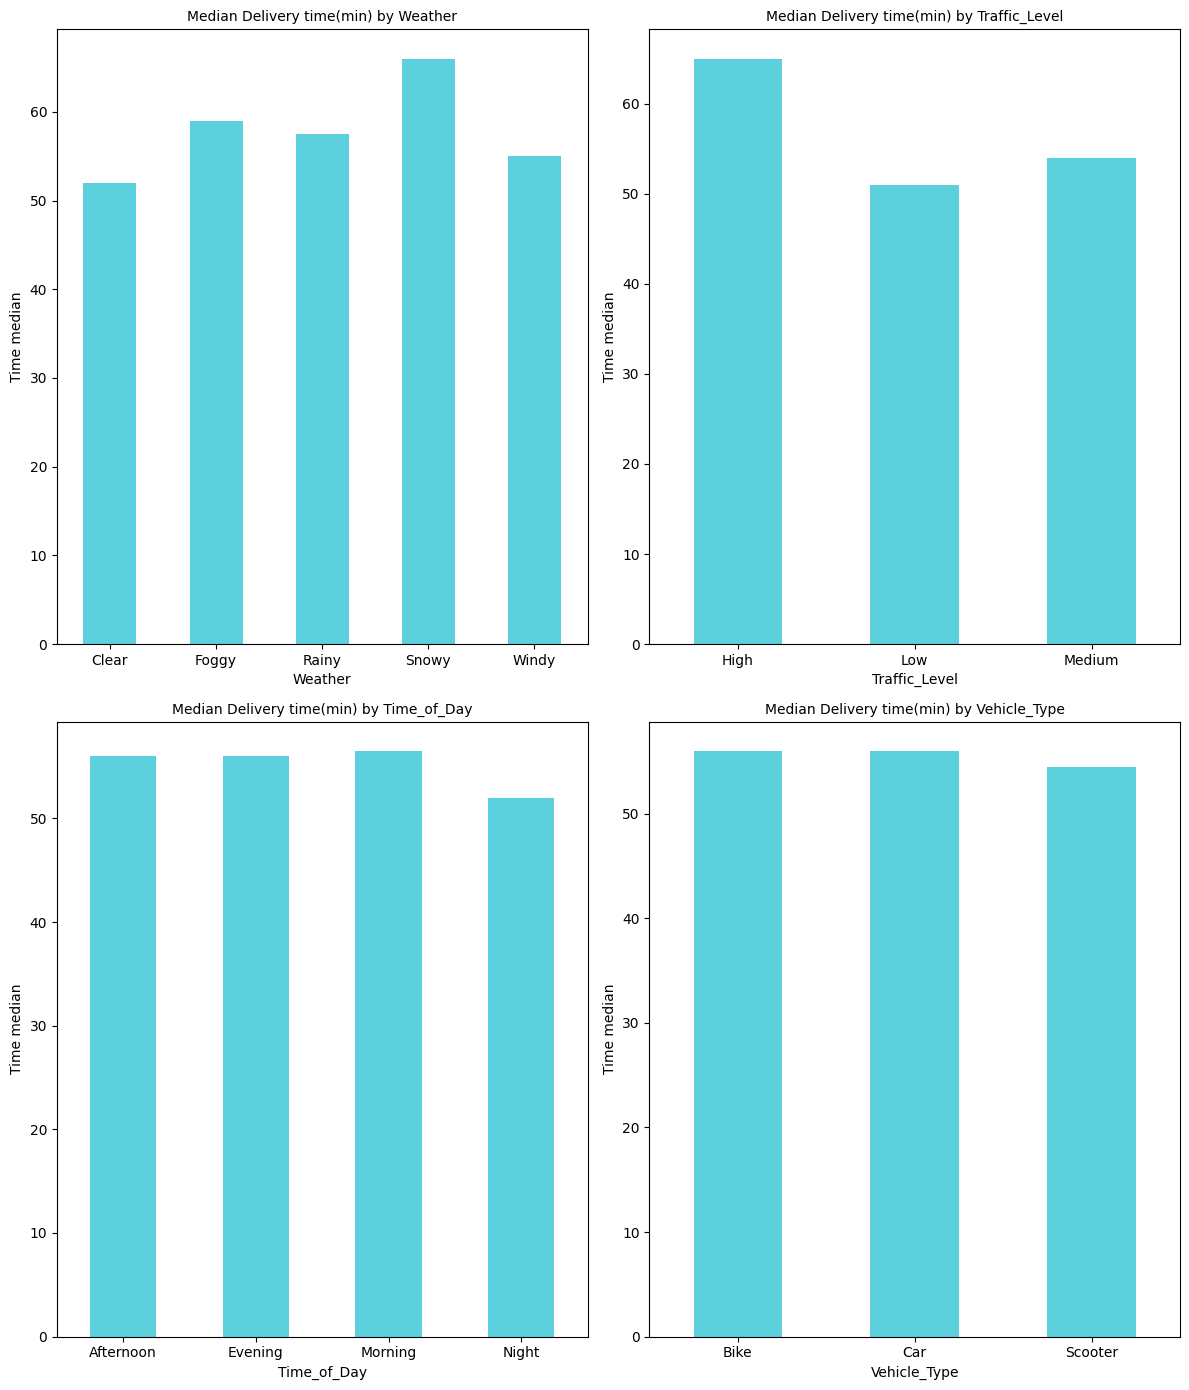

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

_, axes = plt.subplots(2, 2, figsize=(12, 14))
for i in range(len(columns)):
  row = i // 2
  col = i % 2
  df.groupby(columns[i])['Delivery_Time_min'].median().plot(kind='bar', stacked=False, ax=axes[row, col], color=["#17becf"], alpha=0.7)
  axes[row, col].set_title(f'Median Delivery time(min) by {columns[i]}', fontsize=10)
  axes[row, col].set_xlabel(columns[i], fontsize=10)
  axes[row, col].set_ylabel('Time median', fontsize=10)

  axes[row, col].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


# From the graphs we can see that the Time_of_the_day and vehicle_type are not affecting our target


### Correlation Matrix

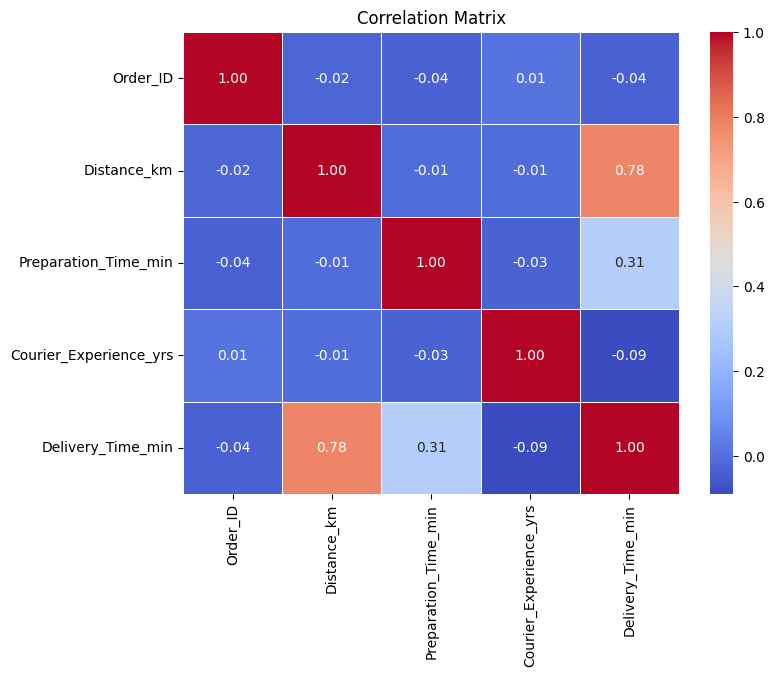

In [10]:
import seaborn as sns


numerical_features = df[["Order_ID","Distance_km","Preparation_Time_min",	"Courier_Experience_yrs",	"Delivery_Time_min"]]
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# From the correlation matrix we can see that that delivery_time is related of affected more by DIstance_km and preparation_time_min 

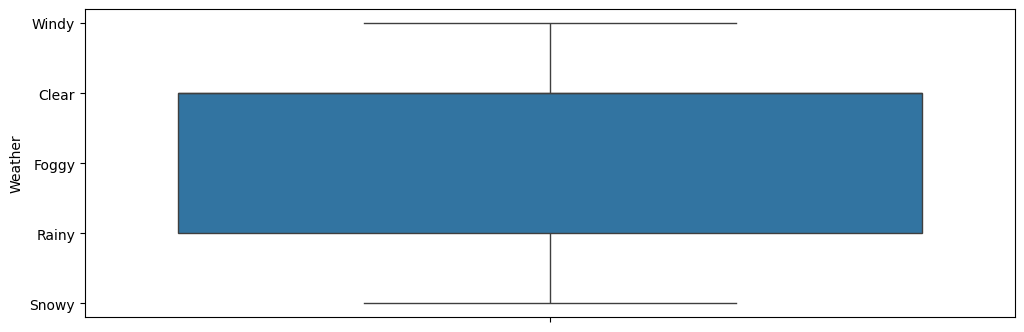

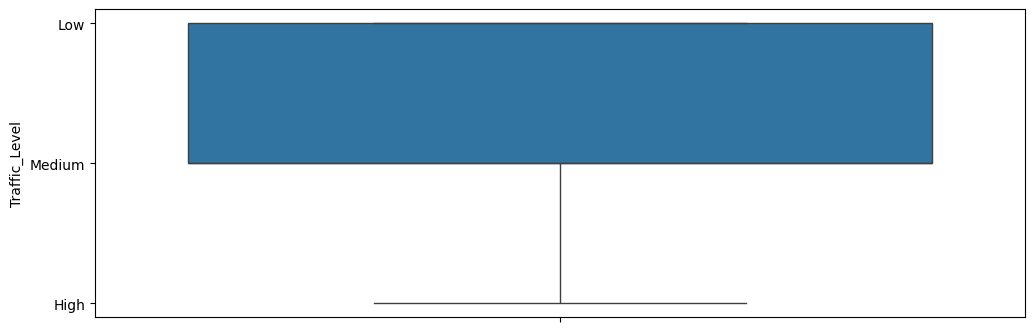

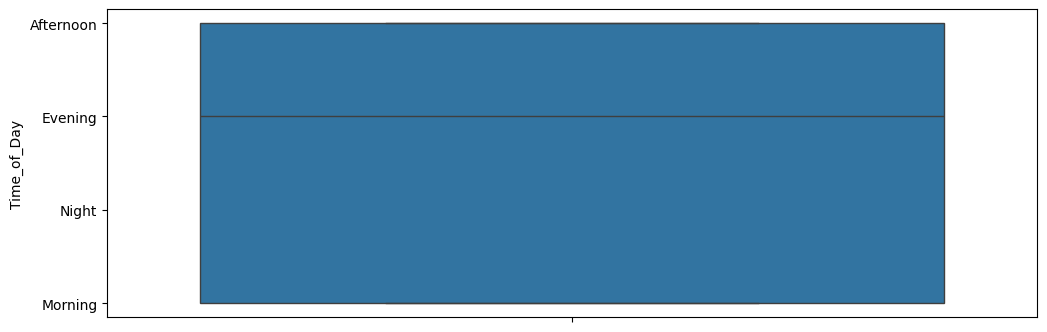

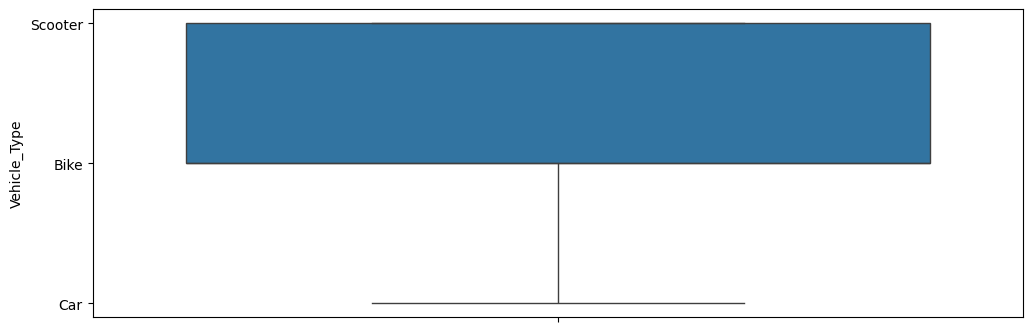

In [11]:
columns = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

# _, axes = plt.subplots(2, 2, figsize=(12, 14))

for column in columns:
  plt.figure(figsize=(12,4))
  sns.boxplot(df[column])
  plt.show()